In [1]:
#Import required Modules
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

print('Modules imported successfully!')

Modules imported successfully!


In [2]:
#Import Dataset
df = pd.read_csv('data.csv')

print('Dataset Loaded Successfully!')

Dataset Loaded Successfully!


In [3]:
#Check the size of the dataset
df.shape

(2227, 3)

In [4]:
#Check the names of the columns
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [5]:
#Check the first 5 rows
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [6]:
#Checking th data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [7]:
#Checking unique values in each column
df.apply(lambda x: len(x.unique()))

x1    1888
x2    1885
y        2
dtype: int64

In [8]:
#Checking the null values 
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [9]:
#Dropping null values
df.dropna(inplace=True)

In [10]:
#Checking for duplicate rows
df.duplicated().sum()

16

In [11]:
#Dropping duplicated rows
df.drop_duplicates(inplace=True)

In [12]:
#Shape
df.shape

(2203, 3)

In [13]:
#Final check before moving Further
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
5,-121.393638,120.037573,1


## Preprocessing and Model Training

<AxesSubplot:xlabel='x1'>

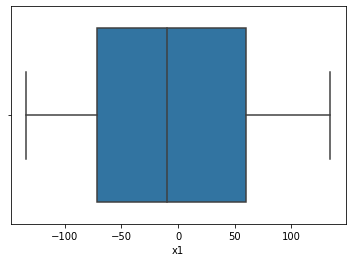

In [14]:
#Checking for outliers
sns.boxplot(df['x1'])

<AxesSubplot:xlabel='x2'>

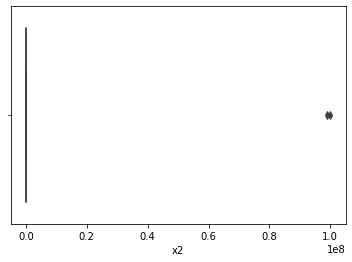

In [15]:
#Checking for outliers
sns.boxplot(df['x2'])

In [16]:
#Calculating mean and standard deviation
data_mean, data_std = np.mean(df['x2']), np.std(df['x2'])

In [17]:
#Setting upper and lower range
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [18]:
#No. of Outliers
outliers = [x for x in df['x2'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 2


In [19]:
#Dropping the outliers
df = df[df['x2'] <= upper]

<AxesSubplot:xlabel='x2'>

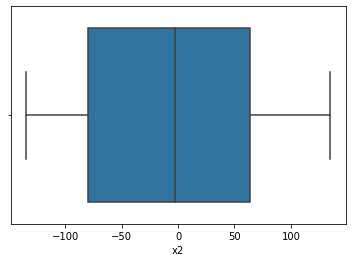

In [20]:
#Plott the x2 again for affirmation
sns.boxplot(df['x2'])

In [21]:
#Splitting the data into feature set and target set
X = df.drop(columns='y')
y = df['y']

In [22]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Function for model evaluation
def oneForAll(models, name):
    n=0
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        n=n+1

In [24]:
#Initialising the models
logReg = LogisticRegression()
svc = SVC(kernel='linear', C=1)
rbf = SVC(kernel='rbf', C=1)
dt = DecisionTreeClassifier()
KNN = KNeighborsClassifier()

In [25]:
#final preparation for fitting
models = [logReg, svc, rbf, dt, KNN]
name = ['Logistic Regression', 'SVM with Linear Kernel', 'SVM with RBF Kernel', 'Decision Tree', 'KNN']
f1_scores=[]
accuracy_scores=[]

In [26]:
#Calling the function
oneForAll(models, name)

In [27]:
#Models and scores  on train and test
models = pd.DataFrame({
    'Model': name,
    'Score': accuracy_scores,
    'F1 Score': f1_scores})

models.sort_values(by='Score', ascending=False)

,Model,Score,F1 Score
4,KNN,0.941043,0.935000
2,SVM with RBF Kernel,0.934240,0.928395
3,Decision Tree,0.929705,0.921914
1,SVM with Linear Kernel,0.718821,0.540741
0,Logistic Regression,0.714286,0.546763


- **Support Vector Machines performed the best on the given dataset as it had the highest accuracy and f1 Score.**

In [28]:
y_pred = rbf.predict(X)

In [29]:
cnf = confusion_matrix(y, y_pred)
cnf

array([[1152,   75],
       [  39,  935]], dtype=int64)

Confusion Matrix on Test Data Plot


<AxesSubplot:>

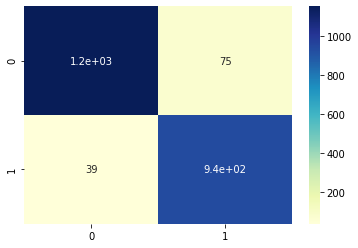

In [30]:
print("Confusion Matrix on Test Data Plot")
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')

- **Support Vector Machines performed the best on the given dataset as it had the highest accuracy and f1 Score.**